In [1]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv(r"C:\Users\shiva\Downloads\Company_Data (1).csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'CompPrice'),
  Text(2, 0, 'Income'),
  Text(3, 0, 'Advertising'),
  Text(4, 0, 'Population'),
  Text(5, 0, 'Price'),
  Text(6, 0, 'Age'),
  Text(7, 0, 'Education')])

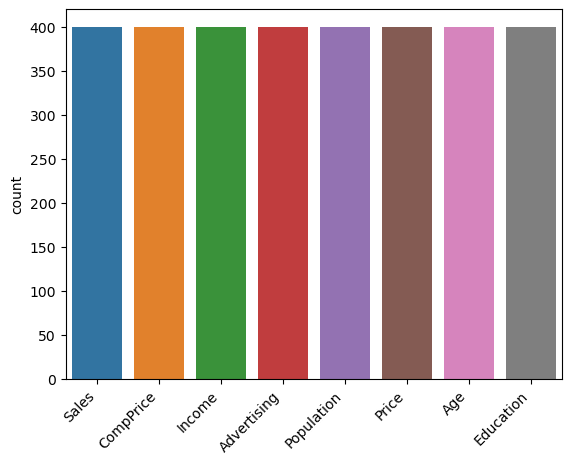

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,)
plt.xticks(rotation=45, ha='right')

<Axes: xlabel='Age', ylabel='Income'>

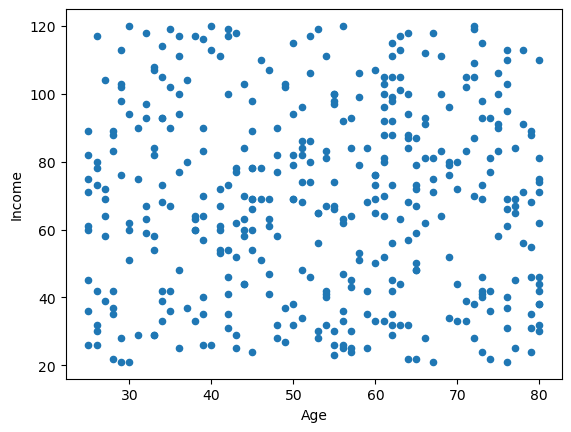

In [7]:
df.plot(kind = 'scatter',x = 'Age',y = 'Income')

<Axes: xlabel='Education'>

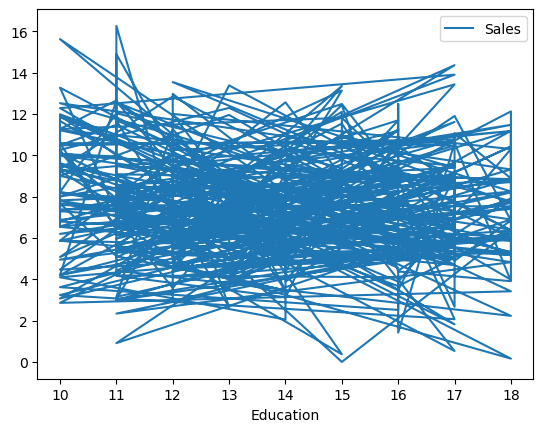

In [8]:
df.plot(kind = 'line',y = 'Sales',x = 'Education')

<Axes: >

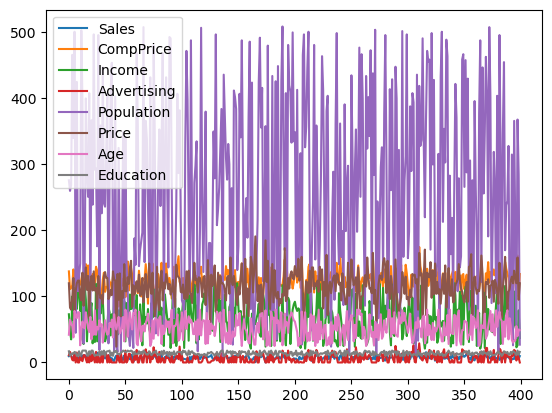

In [9]:
df.plot(kind = 'line')

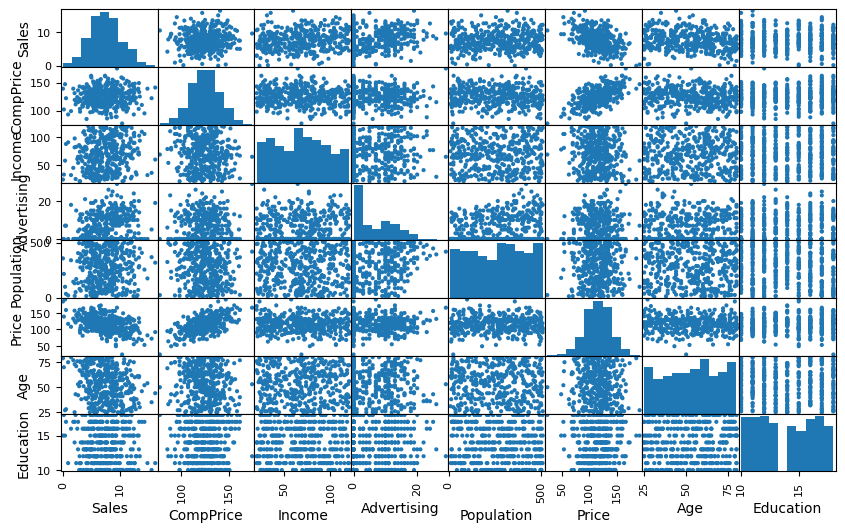

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=1,figsize=(10,6));

In [11]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [12]:
df['Sales_category'] = pd.cut(df['Sales'],bins=[-np.inf, 8, np.inf] , labels=['Low', 'High'])

df = df.drop('Sales', axis=1)

# converts categorical to numerical data
df = pd.get_dummies(df, columns=['ShelveLoc', 'Urban', 'US'])

X = df.drop('Sales_category', axis=1)
y = df['Sales_category']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
rf_classifier = RandomForestClassifier(n_estimators = 40)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=40)

In [14]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_report}')

Accuracy: 0.8125
Confusion Matrix:
[[22 10]
 [ 5 43]]
Classification Report:
              precision    recall  f1-score   support

        High       0.81      0.69      0.75        32
         Low       0.81      0.90      0.85        48

    accuracy                           0.81        80
   macro avg       0.81      0.79      0.80        80
weighted avg       0.81      0.81      0.81        80



In [15]:
len(X_test),len(X_train),len(y_train),len(y_test)

(80, 320, 320, 80)

In [ ]:
INSIGHTS: 
    accuracy : 81.25% thats % of correctly predicted instances.
    confusion matrix: measure of True +ve,-ve and False +ve,-ve value.
    precesion : measure of accuracy of positive prediction.
    recall: ability of the model to capture all the relevant instances.
    F1-score : harmonic mean of precision and recall.

# Fradu data

In [16]:
df1 = pd.read_csv(r"C:\Users\shiva\Downloads\Fraud_check.csv")
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [17]:
df1.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   Taxabel_salary   600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [21]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
Taxabel_salary     0
dtype: int64

In [22]:
df1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


(array([0, 1, 2]),
 [Text(0, 0, 'Taxable.Income'),
  Text(1, 0, 'City.Population'),
  Text(2, 0, 'Work.Experience')])

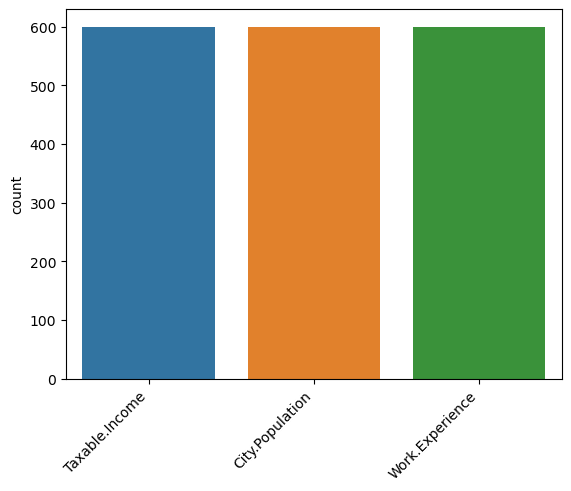

In [23]:
sns.countplot(data=df1,)
plt.xticks(rotation=45, ha='right')

<Axes: xlabel='Work.Experience'>

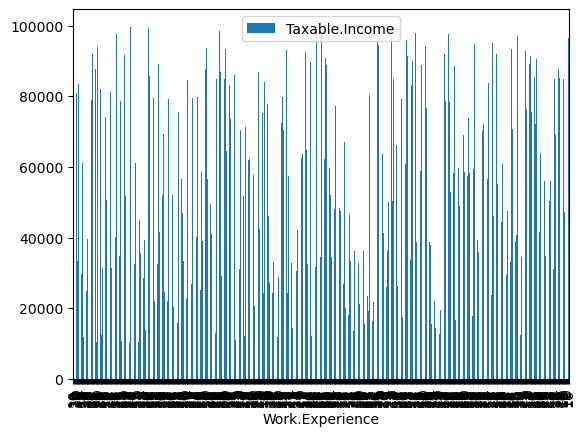

In [28]:
df1.plot(kind = 'bar', x = 'Work.Experience', y = 'Taxable.Income')

<Axes: >

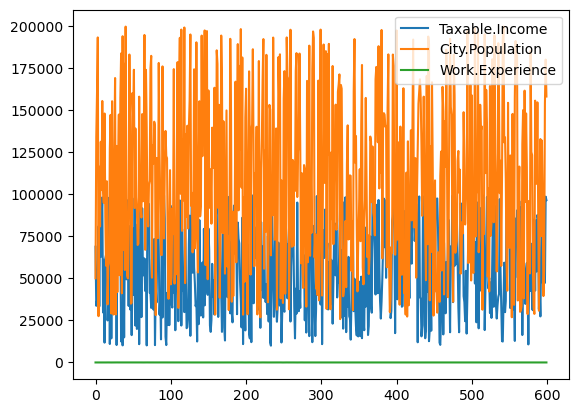

In [32]:
df1.plot(kind = 'line')

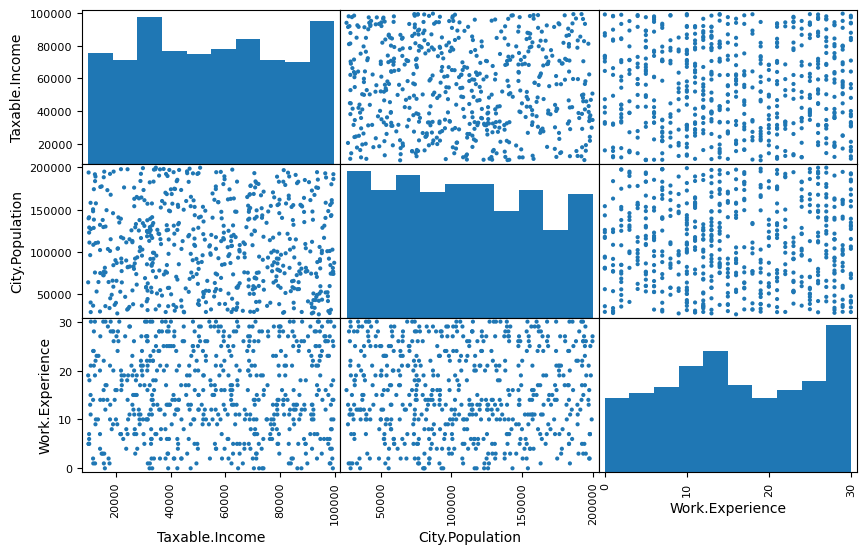

In [30]:
from pandas.plotting import scatter_matrix
scatter_matrix(df1, alpha=1,figsize=(10,6));

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df1['Taxabel_salary'] = df1['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

X = df1.drop(['Taxable.Income', 'Taxabel_salary'], axis=1)
y = df1['Taxabel_salary']

# categorical to variables
X = pd.get_dummies(X, drop_first=True)
#df1 = pd.get_dummies(df1, columns=['Undergrad', 'Marital.Status', 'Urban'],drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf_model = RandomForestClassifier(n_estimators=40)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
cl_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{cl_report}')

Accuracy: 0.7833333333333333
Confusion Matrix:
[[92  5]
 [21  2]]
Classification Report:
              precision    recall  f1-score   support

        Good       0.81      0.95      0.88        97
       Risky       0.29      0.09      0.13        23

    accuracy                           0.78       120
   macro avg       0.55      0.52      0.50       120
weighted avg       0.71      0.78      0.73       120



In [40]:
len(X_test),len(X_train),len(y_train),len(y_test)

(120, 480, 480, 120)

In [ ]:
INSIGHTS:
    Accuracy : = 78.33% ,represents the percentage of correctly predicted instances out of total.
    confusion matrix:= measure of True positive,negative  and False positive ,negative ratio.
    precesion : accuracy of +ve prediction.
    Recall : ability of model to capture the relevant instances.
    F1_score : its harmonic mean of precession and recall.
    